# Exploration of the data

- Useful variables
- Visualising the data

In [1]:
import pandas as pd
import folium
import networkx as nx
import random

In [2]:
stations_holland = pd.read_csv('../data/StationsHolland.csv')
stations_national = pd.read_csv('../data/StationsNationaal.csv')
connections_holland = pd.read_csv('../data/ConnectiesHolland.csv')
connections_national = pd.read_csv('../data/ConnectiesNationaal.csv')

print("Part 1: North- and South-Holland")
print(f"Stations in North- and South-Holland: {len(stations_holland)}")
print(f"Connections in North- and South-Holland: {len(connections_holland)}")
print(f"Mean distance of connections in North- and South-Holland: {connections_holland['distance'].mean()}")
print("________________________________________________________________________")
print("Part 2: the Netherlands")
print(f"Stations in the Netherlands: {len(stations_national)}")
print(f"Connections in the Netherlands: {len(connections_national)}")
print(f"Mean distance of connections in North- and South-Holland: {connections_national['distance'].mean()}")

Part 1: North- and South-Holland
Stations in North- and South-Holland: 22
Connections in North- and South-Holland: 28
Mean distance of connections in North- and South-Holland: 13.607142857142858
________________________________________________________________________
Part 2: the Netherlands
Stations in the Netherlands: 61
Connections in the Netherlands: 89
Mean distance of connections in North- and South-Holland: 17.426966292134832


## Where are the stations located?

For plotting the maps, we use the Folium library. It is based on leaflet.js. <br>
[Folium documentation](https://python-visualization.github.io/folium/)

To actually view the maps (because GitHub won't let you), please visit [this link](https://nbviewer.org/github/maiklarooij/Trainspotters/blob/main/milestones/exploration.ipynb).

In [3]:
def train_map(stations, connections, middle_loc):
    """ Creates a folium train map, showing stations and connections. """

    # Create a basemap with a given middle point
    base_map = folium.Map(location = middle_loc, tiles = 'cartodbpositron', zoom_start = 8)

    # Add a marker for every station
    for id, station in stations.iterrows():
        folium.Marker(
            location = [station['x'], station['y']],
            popup = f"Station {station['station']}. Location: ({station['x']}, {station['y']})",
            icon = folium.Icon(color = 'darkblue', icon = 'train', icon_color = '#FEBE00', prefix = 'fa')).add_to(base_map)

    # Create a merged df to retrieve x and y of station1 and station2
    conn_station_merge = connections.merge(
        stations, left_on = 'station1', right_on = 'station').merge(
            stations, left_on = 'station2', right_on = 'station', suffixes = ('_station1', '_station2'))

    # Add lines for every connection
    for id, connection in conn_station_merge.iterrows():
        station1_loc = (connection['x_station1'], connection['y_station1'])
        station2_loc = (connection['x_station2'], connection['y_station2'])
        folium.PolyLine(
            locations = [station1_loc, station2_loc],
            popup = f"{connection['station1']} to {connection['station2']}: {connection['distance']} minutes").add_to(base_map)
            
    return base_map

### Part 1: Stations in North- and South-Holland

In [4]:
# Create a nice interactive map using folium, starting point is Amsterdam Central station
train_map(stations_holland, connections_holland, [52.37888718, 4.900277615])

### Part 2: Stations in the Netherlands

In [5]:
# Create a nice interactive map using folium, starting point is middle point of the Netherlands (Putten)
train_map(stations_national, connections_national, [52.243333, 5.634167])

### Marx stuff, probeersels

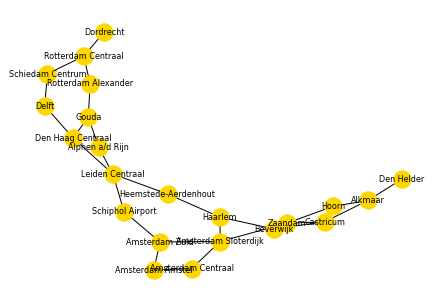

In [6]:
G = nx.from_pandas_edgelist(connections_holland, 'station1', 'station2')

nx.draw(G, with_labels = True, font_size = 8, node_color = 'gold')

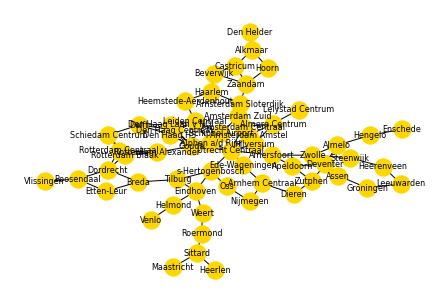

In [7]:
G = nx.from_pandas_edgelist(connections_national, 'station1', 'station2')

nx.draw_kamada_kawai(G, with_labels = True, font_size = 8, node_color = 'gold')